<a href="https://colab.research.google.com/github/sudhamsalagar123/Image-classification-model-using-pytorch/blob/main/image_classification_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import librais

In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np


2. Check for GPU

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cpu


 3. Load the FashionMNIST Dataset

In [18]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


4. Create Dataloaders

In [19]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


5. Define the Neural Network

In [20]:
class NeuralNetworks(nn.Module):
    def __init__(self):
        super(NeuralNetworks, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)  # Flattens 28x28 into 784
        logits = self.linear_relu_stack(x)
        return logits


6. Initialize Model, Loss, and Optimizer

In [21]:
model = NeuralNetworks().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


7. Define Training Loop

In [22]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # set model to training mode

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)  # forward pass
        loss = loss_fn(pred, y)  # calculate loss

        optimizer.zero_grad()  # clear previous gradients
        loss.backward()        # backpropagate
        optimizer.step()       # update weights

        if batch % 100 == 0:
            current = batch * len(X)
            print(f"Loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]")


 8. Define Test Loop

In [23]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # evaluation mode

    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Accuracy: {(100*correct):>0.1f}%  Avg loss: {test_loss:.6f}")


9. Train the Model for Multiple Epochs

In [24]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Training done.")


Epoch 1
-------------------------------
Loss: 2.310379  [    0/60000]
Loss: 2.290962  [ 6400/60000]
Loss: 2.270978  [12800/60000]
Loss: 2.258363  [19200/60000]
Loss: 2.249931  [25600/60000]
Loss: 2.220146  [32000/60000]
Loss: 2.225662  [38400/60000]
Loss: 2.196443  [44800/60000]
Loss: 2.191933  [51200/60000]
Loss: 2.158610  [57600/60000]
Test Accuracy: 47.6%  Avg loss: 2.155621
Epoch 2
-------------------------------
Loss: 2.168332  [    0/60000]
Loss: 2.158195  [ 6400/60000]
Loss: 2.102606  [12800/60000]
Loss: 2.113450  [19200/60000]
Loss: 2.068285  [25600/60000]
Loss: 2.009906  [32000/60000]
Loss: 2.035776  [38400/60000]
Loss: 1.966199  [44800/60000]
Loss: 1.973034  [51200/60000]
Loss: 1.893308  [57600/60000]
Test Accuracy: 60.4%  Avg loss: 1.900723
Epoch 3
-------------------------------
Loss: 1.935617  [    0/60000]
Loss: 1.908582  [ 6400/60000]
Loss: 1.796683  [12800/60000]
Loss: 1.824242  [19200/60000]
Loss: 1.718220  [25600/60000]
Loss: 1.678196  [32000/60000]
Loss: 1.692912  [3

10. Save and Load the Model

In [25]:
torch.save(model.state_dict(), "model.pth")
print("Model saved.")

model = NeuralNetworks()
model.load_state_dict(torch.load("model.pth"))
model.eval()


Model saved.


NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

11.Define class labels

In [26]:

classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

12. Make a Prediction

In [27]:
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "Ankle boot", Actual: "Ankle boot"


13. Visualize 16 Images from the Training Set

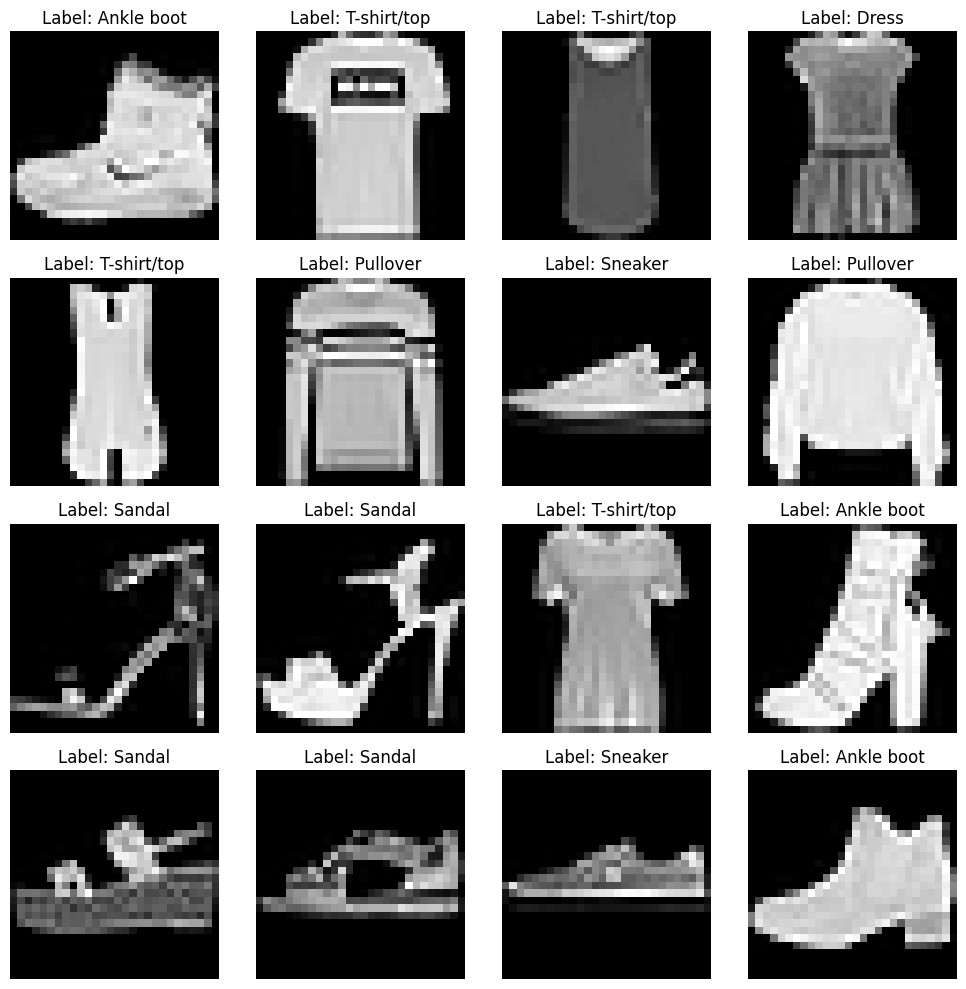

In [28]:
for images, labels in train_dataloader:
    break

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {classes[labels[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
